In [3]:
import keras
from keras.datasets import cifar10
import pandas as pd

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

display('x_train shape:', x_train.shape)
display('y_train shape:', y_train.shape)

display('x_test shape:', x_test.shape)
display('y_test shape:', y_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


'x_train shape:'

(50000, 32, 32, 3)

'y_train shape:'

(50000, 1)

'x_test shape:'

(10000, 32, 32, 3)

'y_test shape:'

(10000, 1)

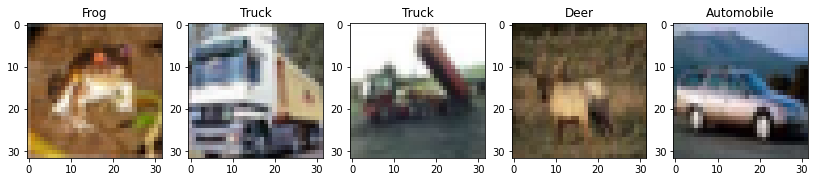

In [4]:
import matplotlib.pyplot as plt

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# show sample images
fig, axes = plt.subplots(1, 5, figsize=(14, 14))

for i, axe in enumerate(axes):
  axe.axis('off')
  axe.imshow(x_train[i])
  axe.set_title(labels[y_train[i][0]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


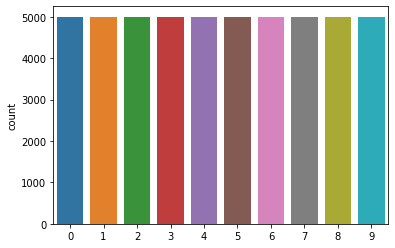

In [5]:
# show count plot of training dataset
import seaborn as sns

sns.countplot(y_train.ravel())

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# convert x, y to table before train
X_train = x_train.reshape(-1, 32*32*3)
X_test = x_test.reshape(-1, 32*32*3)

Y_train = y_train.reshape(-1)
Y_test = y_test.reshape(-1)

display(X_train[:5,:])

display(X_test[:5,:])

array([[ 59,  62,  63, ..., 123,  92,  72],
       [154, 177, 187, ..., 143, 133, 144],
       [255, 255, 255, ...,  80,  86,  84],
       [ 28,  25,  10, ...,  72,  65,  46],
       [170, 180, 198, ...,  73,  77,  80]], dtype=uint8)

array([[158, 112,  49, ...,  21,  67, 110],
       [235, 235, 235, ..., 186, 200, 199],
       [158, 190, 222, ...,   7,   8,   7],
       [155, 156, 149, ...,  73,  68,  50],
       [ 65,  68,  50, ..., 128, 156, 117]], dtype=uint8)

In [7]:
# scale features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train_scaled[:5,:])

display(X_test_scaled[:5,:])

array([[-0.97682401, -1.01575822, -0.86457067, ..., -0.05604997,
        -0.54031962, -0.6414024 ],
       [ 0.3172399 ,  0.56158831,  0.67677953, ...,  0.25199477,
         0.11412375,  0.44823767],
       [ 1.69303417,  1.63144074,  1.52203609, ..., -0.71834616,
        -0.63609182, -0.45979572],
       [-1.39909749, -1.52325232, -1.52337358, ..., -0.84156406,
        -0.97129452, -1.03488353],
       [ 0.53518751,  0.60273648,  0.8135122 , ..., -0.82616182,
        -0.77975012, -0.52033128]])

array([[ 0.37172681, -0.32995538, -1.03859408, ..., -1.62707815,
        -0.93937045, -0.06631459],
       [ 1.42059966,  1.3571196 ,  1.27343122, ...,  0.91429096,
         1.18357999,  1.2806016 ],
       [ 0.37172681,  0.73989705,  1.11183805, ..., -1.84270946,
        -1.88113043, -1.62510523],
       [ 0.33086163,  0.27355112,  0.20443027, ..., -0.82616182,
        -0.92340842, -0.97434797],
       [-0.89509365, -0.93346188, -1.02616384, ...,  0.02096121,
         0.48125052,  0.03962264]])

In [8]:
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')

In [9]:
from sklearn.metrics import accuracy_score

Y_pred = knn.predict(X_test_scaled[:25])
accuracy_score(Y_pred, Y_test[:25])

0.28

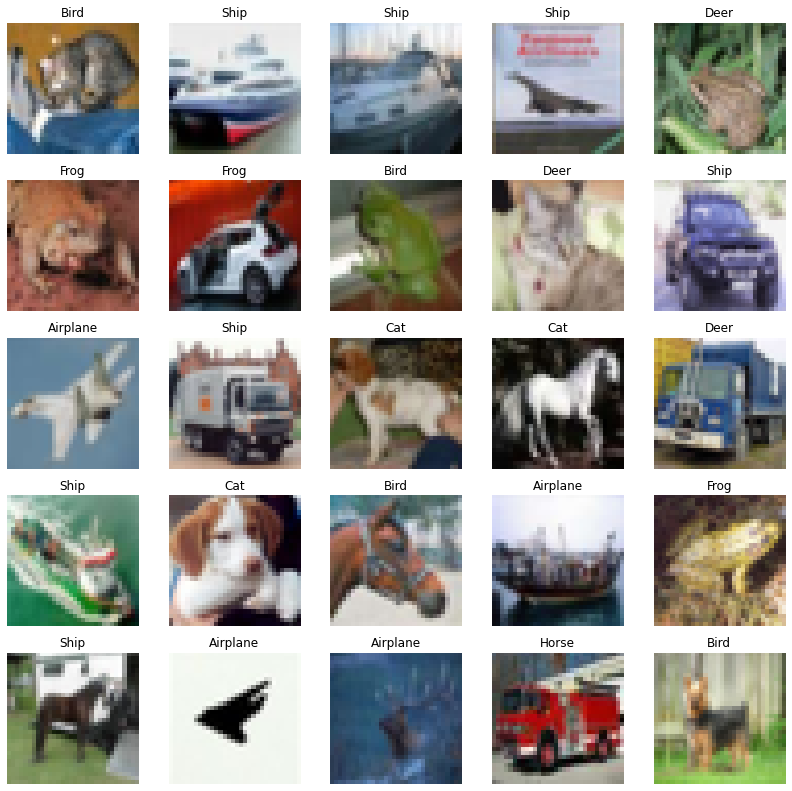

In [15]:
# show some predicted samples
fig, axes = plt.subplots(5, 5, figsize=(14, 14))

for i, axe in enumerate(axes.ravel()):
  axe.axis('off')
  axe.imshow(x_test[i])
  axe.set_title(labels[Y_pred[i]])